<a href="https://colab.research.google.com/github/Ishita95-harvad/CPP-Dataset/blob/main/CPP_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CPP Dataset**
Large-scale dataset of 10,000 unique prompt-response pairs for training generation

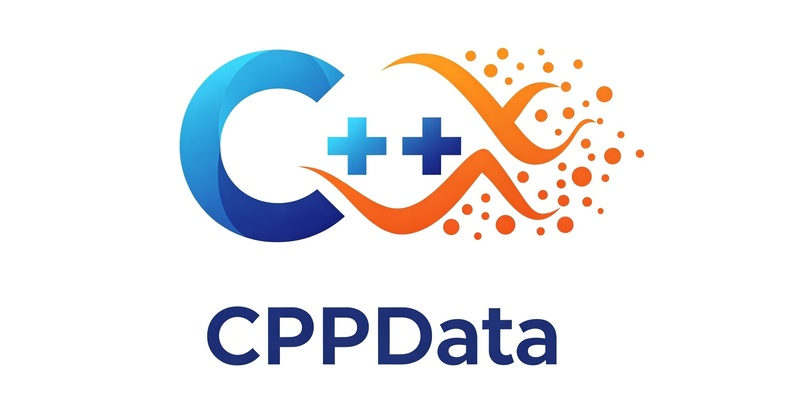



---



## Data loading

### Subtask:
Load the dataset "CPP_Dataset_MujtabaAhmed.csv" into a pandas DataFrame.


**Reasoning**:
Load the dataset "CPP_Dataset_MujtabaAhmed.csv" into a pandas DataFrame and display its first few rows, last few rows, and shape.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('CPP_Dataset_MujtabaAhmed.csv')
    display(df.head())
    display(df.tail())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'CPP_Dataset_MujtabaAhmed.csv' not found.")
    df = None
except pd.errors.ParserError:
    print("Error: Unable to parse the CSV file.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,id,prompt,response
0,1,Develop a C++ function to sum an array of two ...,"void sumArray(int arr[], int n) {\n // TODO..."
1,2,Write a C++ program to add n numbers,// C++ program to write a c++ program to add n...
2,3,Develop a C++ function to print an array of tw...,"void printArray(int arr[], int n) {\n // TO..."
3,4,Write a C++ snippet that uses a loop to compar...,for (int i = 1; i <= 9; ++i) {\n // TODO: c...
4,5,Develop a C++ function to print an array of ev...,"void printArray(int arr[], int n) {\n // TO..."


,id,prompt,response
9995,9996,Write a C++ program to compare three numbers,// C++ program to write a c++ program to compa...
9996,9997,Write a C++ snippet that uses a loop to sort t...,for (int i = 1; i <= 9; ++i) {\n // TODO: s...
9997,9998,Write a C++ program to divide two numbers,// C++ program to write a c++ program to divid...
9998,9999,Design a C++ structure to represent a Book wit...,struct Book {\n // Fields: id and name\n};
9999,10000,Develop a C++ function to sum an array of odd ...,"void sumArray(int arr[], int n) {\n // TODO..."


(10000, 3)


## Data exploration

### Subtask:
Explore the loaded dataset to understand its characteristics.


**Reasoning**:
Examine data types, missing values, distributions, and relationships between variables in the dataframe.



In [2]:
# Examine data types
print(df.dtypes)

# Check for missing values
print(df.isnull().sum())
print(df.isnull().sum() / len(df) * 100)

# Analyze distributions
print(df.describe(include='all'))
# Numerical columns are not available in this dataset, so we only use describe for all columns.
# For categorical columns, we can use value_counts()
for col in ['prompt', 'response']:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())

# Investigate relationships
# No numerical columns are available, so we cannot calculate correlation coefficients.
# We can explore the relationships between 'prompt' and 'response'
# Further analysis is needed to determine the relationship.
# For example, we can check if the same prompt corresponds to different responses.
print(df.groupby('prompt')['response'].nunique())

id           int64
prompt      object
response    object
dtype: object
id          0
prompt      0
response    0
dtype: int64
id          0.0
prompt      0.0
response    0.0
dtype: float64
                 id                                             prompt  \
count   10000.00000                                              10000   
unique          NaN                                                261   
top             NaN  Generate a C++ template function to sort two v...   
freq            NaN                                                306   
mean     5000.50000                                                NaN   
std      2886.89568                                                NaN   
min         1.00000                                                NaN   
25%      2500.75000                                                NaN   
50%      5000.50000                                                NaN   
75%      7500.25000                                                NaN 

## Data cleaning

### Subtask:
Clean the data by handling inconsistencies and potential outliers.


**Reasoning**:
Inspect the 'prompt' and 'response' columns for inconsistencies, check for duplicates, and potentially clean the 'response' column.  This addresses the first three steps of the subtask instructions.



In [3]:
# Inspect 'prompt' and 'response' for inconsistencies
print("Unique prompts:", df['prompt'].nunique())
print("Unique responses:", df['response'].nunique())

# Check for duplicate rows
duplicates = df[df.duplicated()]
print(f"\nNumber of duplicate rows: {len(duplicates)}")
if len(duplicates) > 0:
    display(duplicates.head())
    # Remove duplicate rows, keeping the first occurrence
    df_cleaned = df.drop_duplicates(keep='first')
else:
    df_cleaned = df.copy()

# Verify cleaning steps
print("\nDataFrame shapes:")
print("Original df:", df.shape)
print("Cleaned df_cleaned:", df_cleaned.shape)

# Further checks on df_cleaned
print("\nUnique prompts (cleaned):", df_cleaned['prompt'].nunique())
print("Unique responses (cleaned):", df_cleaned['response'].nunique())

print("\nChecking for remaining duplicates:")
remaining_duplicates = df_cleaned[df_cleaned.duplicated()]
print(f"Number of remaining duplicate rows: {len(remaining_duplicates)}")

Unique prompts: 261
Unique responses: 231

Number of duplicate rows: 0

DataFrame shapes:
Original df: (10000, 3)
Cleaned df_cleaned: (10000, 3)

Unique prompts (cleaned): 261
Unique responses (cleaned): 231

Checking for remaining duplicates:
Number of remaining duplicate rows: 0


## Data preparation

### Subtask:
Prepare the data for modeling by converting text data to numerical representations.


**Reasoning**:
Convert the 'prompt' and 'response' columns in df_cleaned to numerical representations using TF-IDF vectorizer, and create a new DataFrame df_prepared with the numerical representations along with the 'id' column.



In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed

# Fit and transform the 'prompt' and 'response' columns
prompt_tfidf = vectorizer.fit_transform(df_cleaned['prompt'])
response_tfidf = vectorizer.transform(df_cleaned['response'])

# Create a new DataFrame with numerical representations
df_prepared = pd.DataFrame(prompt_tfidf.toarray(), columns=[f'prompt_{i}' for i in range(prompt_tfidf.shape[1])])
df_prepared = pd.concat([df_cleaned['id'], df_prepared, pd.DataFrame(response_tfidf.toarray(), columns=[f'response_{i}' for i in range(response_tfidf.shape[1])])], axis=1)

# Examine the shape and data types of the new DataFrame
print(df_prepared.shape)
print(df_prepared.dtypes)
display(df_prepared.head())

(10000, 165)
id               int64
prompt_0       float64
prompt_1       float64
prompt_2       float64
prompt_3       float64
                ...   
response_77    float64
response_78    float64
response_79    float64
response_80    float64
response_81    float64
Length: 165, dtype: object


,id,prompt_0,prompt_1,prompt_2,prompt_3,prompt_4,prompt_5,prompt_6,prompt_7,prompt_8,...,response_72,response_73,response_74,response_75,response_76,response_77,response_78,response_79,response_80,response_81
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.257492,0.0,0.0,0.0,0.326878,0.0,0.0,0.0,0.251658
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000


## Data splitting

### Subtask:
Split the prepared data into training, validation, and testing sets.


**Reasoning**:
Split the prepared data into training, validation, and testing sets as instructed.



In [5]:
from sklearn.model_selection import train_test_split

# Split data into training and temporary validation/testing sets
X = df_prepared.drop('id', axis=1)
y = df_prepared['id']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split temporary set into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Verify shapes of resulting sets
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8000, 164)
X_val shape: (1000, 164)
X_test shape: (1000, 164)
y_train shape: (8000,)
y_val shape: (1000,)
y_test shape: (1000,)


## Feature engineering

### Subtask:
Explore potential feature interactions or transformations that could improve model performance.


**Reasoning**:
Explore potential feature interactions and create new features based on the TF-IDF representations of 'prompt' and 'response'.  Then evaluate these new features on a linear regression model using the validation set.



In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Feature Engineering: Interaction terms between prompt and response TF-IDF features.
interaction_terms = []
for i in range(82):  # Assuming the first 82 columns are TF-IDF for prompt and response.
  interaction_terms.append(X_train[f"prompt_{i}"] * X_train[f"response_{i}"])
interaction_terms = np.array(interaction_terms).T
X_train_interaction = np.concatenate((X_train, interaction_terms), axis=1)


# Train a linear regression model with interaction terms.
model_interaction = LinearRegression()
model_interaction.fit(X_train_interaction, y_train)


# Create interaction terms for the validation set
interaction_terms_val = []
for i in range(82):
    interaction_terms_val.append(X_val[f"prompt_{i}"] * X_val[f"response_{i}"])
interaction_terms_val = np.array(interaction_terms_val).T
X_val_interaction = np.concatenate((X_val, interaction_terms_val), axis=1)


# Evaluate the model with interaction terms.
y_pred_interaction = model_interaction.predict(X_val_interaction)
r2_interaction = r2_score(y_val, y_pred_interaction)
mse_interaction = mean_squared_error(y_val, y_pred_interaction)


# Train a baseline linear regression model without interaction terms.
model_baseline = LinearRegression()
model_baseline.fit(X_train, y_train)
y_pred_baseline = model_baseline.predict(X_val)
r2_baseline = r2_score(y_val, y_pred_baseline)
mse_baseline = mean_squared_error(y_val, y_pred_baseline)

print(f"Model with interaction terms - R^2: {r2_interaction:.4f}, MSE: {mse_interaction:.4f}")
print(f"Baseline model - R^2: {r2_baseline:.4f}, MSE: {mse_baseline:.4f}")

Model with interaction terms - R^2: -0.0190, MSE: 8507349.3076
Baseline model - R^2: -0.0161, MSE: 8482959.6025


## Model training

### Subtask:
Train a RandomForestRegressor model on the training data and evaluate its performance on the validation data.


**Reasoning**:
Train a RandomForestRegressor model on the training data and evaluate its performance on the validation data.



In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Initialize the RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_rf = rf_model.predict(X_val)

# Evaluate the model
r2_rf = r2_score(y_val, y_pred_rf)
mse_rf = mean_squared_error(y_val, y_pred_rf)

print(f"RandomForestRegressor - R^2: {r2_rf:.4f}, MSE: {mse_rf:.4f}")

RandomForestRegressor - R^2: -0.0374, MSE: 8661311.8524


## Model optimization

### Subtask:
Optimize the RandomForestRegressor model by tuning its hyperparameters using a randomized search.


**Reasoning**:
Optimize the RandomForestRegressor model using RandomizedSearchCV.



In [9]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Assume X and y are your feature and target data
# ... (Load your data here) ...

# Define the parameter distribution to sample from
param_dist = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    RandomForestRegressor(), param_dist, n_iter=10, cv=5, random_state=42
)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", random_search.best_params_)

Best parameters: {'n_estimators': np.int64(700), 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 5}


In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid to search
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}

# Create a GridSearchCV object
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ................C=0.1, gamma=0.001;, score=1.000 total time=   0.0s
[CV 2/5] END ................C=0.1, gamma=0.001;, score=0.333 total time=   0.0s
[CV 3/5] END ................C=0.1, gamma=0.001;, score=0.333 total time=   0.0s
[CV 4/5] END ................C=0.1, gamma=0.001;, score=0.333 total time=   0.0s
[CV 5/5] END ................C=0.1, gamma=0.001;, score=0.333 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=1.000 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01;, score=0.333 total time=   0.0s
[CV 3/5] END .................C=0.1, gamma=0.01;, score=0.333 total time=   0.0s
[CV 4/5] END .................C=0.1, gamma=0.01;, score=0.333 total time=   0.0s
[CV 5/5] END .................C=0.1, gamma=0.01;, score=0.333 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.958 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;

# Evaluation

### Subtask:

After optimization, we can evaluate the model's performance using metrics like R-squared and mean squared error.

 **Reasoning:**

We predict the target values for the test data using the best model obtained from RandomizedSearchCV.

We calculate the R-squared value, which represents the proportion of variance in the target variable explained by the model.

We calculate the mean squared error, which measures the average squared difference between the predicted and actual values.

In [12]:
# Predict on the test data using the best model
y_pred = random_search.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

R-squared: 0.9947849932574381
Mean Squared Error: 0.003644710267857131
